# Preterm Infant Cardio-Respiratory Signals Database

Source: https://physionet.org/content/picsdb/1.0.0/

## Python prelude

Import basic packages

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import wfdb # read Physionet/picsdb file format

## Data import

**Assumption**: data directory is in the current folder and has not been renamed after download from Physionet.  
 (Adapt if necessary)

In [2]:
data_dir = "./preterm-infant-cardio-respiratory-signals-database-1.0.0"
print("working directory: ", os.getcwd())
os.chdir(data_dir) # switch into data directory 
current_dir = os.getcwd()
print("switched to: ", current_dir) # confirm current working directory

working directory:  /home/frederic/Projects/picsdb
switched to:  /home/frederic/Projects/picsdb/preterm-infant-cardio-respiratory-signals-database-1.0.0


Make a list of all files in this directory, used later to iterate over all files.

In [3]:
L = os.listdir()
for l in L:
    #print(l)
    pass

## Manual file selection

Select one file manually for inspection and loaded with help of the wfdb library:

In [5]:
file_index = 1
file_ecg = f"infant{file_index:d}_ecg"
file_resp = f"infant{file_index:d}_resp"
print("Loading ECG file : ", file_ecg)
print("Loading RESP file: ", file_resp)
record_ecg = wfdb.rdrecord(file_ecg)
record_resp = wfdb.rdrecord(file_resp)

Loading ECG file :  infant1_ecg
Loading RESP file:  infant1_resp


The loaded files contain lots of metadata, the actual ECG/RESP waveforms are stored as arrays.  
The `wfdb` package stored metadata and data in its own format `wfdb.io.record.Record`, but can be retrieved as a Python dictionary (`dict`):

In [6]:
d_ecg = record_ecg.__dict__
d_resp = record_resp.__dict__
print(d_ecg)
print(d_resp)

{'record_name': 'infant1_ecg', 'n_sig': 1, 'fs': 250, 'counter_freq': None, 'base_counter': None, 'sig_len': 41052191, 'base_time': None, 'base_date': None, 'comments': [], 'sig_name': ['ECG'], 'p_signal': array([[-0.01998352],
       [-0.01998352],
       [-0.01498764],
       ...,
       [-0.31474046],
       [-0.07868511],
       [ 0.33597295]]), 'd_signal': None, 'e_p_signal': None, 'e_d_signal': None, 'file_name': ['infant1_ecg.dat'], 'fmt': ['16'], 'samps_per_frame': [1], 'skew': [None], 'byte_offset': [None], 'adc_gain': [800.6597], 'baseline': [28], 'units': ['mV'], 'adc_res': [0], 'adc_zero': [0], 'init_value': [12], 'checksum': [-25872], 'block_size': [0]}
{'record_name': 'infant1_resp', 'n_sig': 1, 'fs': 500, 'counter_freq': None, 'base_counter': None, 'sig_len': 82122000, 'base_time': None, 'base_date': None, 'comments': [], 'sig_name': ['RESP'], 'p_signal': array([[-0.55500755],
       [-0.55500755],
       [-0.5535156 ],
       ...,
       [24.17565154],
       [24.177143

Some useful parameters are stored under the following keys: 

In [7]:
print("ECG record: ", d_ecg['record_name'])
print("number of signals: ", d_ecg['n_sig'])
print("sampling frequency: ", d_ecg['fs'], "Hz")
print("Number of samples: ", d_ecg['sig_len'])
print("Signal name: ", d_ecg['sig_name'])

ECG record:  infant1_ecg
number of signals:  1
sampling frequency:  250 Hz
Number of samples:  41052191
Signal name:  ['ECG']


In [8]:
print("RESP record: ", d_resp['record_name'])
print("number of signals: ", d_resp['n_sig'])
print("sampling frequency: ", d_resp['fs'], "Hz")
print("Number of samples: ", d_resp['sig_len'])
print("Signal name: ", d_resp['sig_name'])

RESP record:  infant1_resp
number of signals:  1
sampling frequency:  500 Hz
Number of samples:  82122000
Signal name:  ['RESP']


**NOTE**: not all the records use the same sampling frequency, you should therefore read the sampling frequency from the metadata.

Next, extract the ECG/RESP data arrays and convert them into 1-dimensional arrays using `ravel`:

In [9]:
x_ecg = d_ecg['p_signal'].ravel()
print("Number of ECG samples: ", x_ecg.shape[0], " data type: ", x_ecg.dtype)

Number of ECG samples:  41052191  data type:  float64


In [10]:
x_resp = d_resp['p_signal'].ravel()
print("Number of RESP samples: ", x_resp.shape[0], " data type: ", x_resp.dtype)

Number of RESP samples:  82122000  data type:  float64


Store the sampling rates as separate variables:

In [11]:
fs_ecg = d_ecg['fs'] # ECG sampling rate in Hz
dt_ecg = 1/fs_ecg # ECG sampling interval in sec.
fs_resp = d_resp['fs'] # RESP sampling rate in Hz
dt_resp = 1/fs_resp # RESP sampling interval in sec.
print("ECG sampling frequency: ", fs_ecg, " Hz")
print("ECG sampling interval dt = ", dt_ecg, " sec.")
print("RESP sampling frequency: ", fs_resp, " Hz")
print("RESP sampling interval dt = ", dt_resp, " sec.")

ECG sampling frequency:  250  Hz
ECG sampling interval dt =  0.004  sec.
RESP sampling frequency:  500  Hz
RESP sampling interval dt =  0.002  sec.


## Select time window manually

In [20]:
# set display time limits manually, recordings are many hours, millions of data points...
t0_sec, t1_sec = 90620, 90640 # seconds

# ...or, if you want to look at the whole recording:
#t0_sec, t1_sec = 0, x_resp.shape[0]*dt_resp # seconds, based on RESP signal

# convert seconds to samples, respect different sampling rates for ECG and RESP signals
t0_sample_ecg = round(t0_sec * fs_ecg)
t1_sample_ecg = round(t1_sec * fs_ecg)
t0_sample_resp = round(t0_sec * fs_resp)
t1_sample_resp = round(t1_sec * fs_resp)

Plot the result in an external window for inspection:

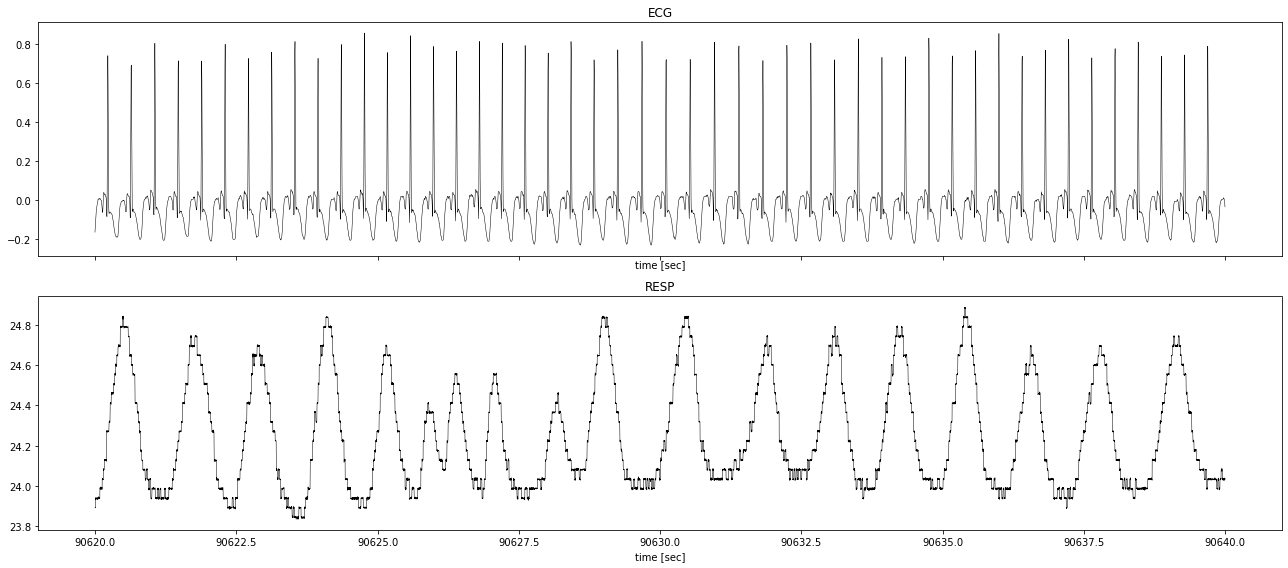

In [23]:
# this tells the notebook to open figures outside of the notebook
#%matplotlib qt
%matplotlib inline

time_ecg = np.arange(x_ecg.shape[0])*dt_ecg # ECG time axis
time_resp = np.arange(x_resp.shape[0])*dt_resp # RESP time axis

fig1, ax = plt.subplots(2, 1, figsize=(18,8), sharex=True)
ax[0].plot(time_ecg[t0_sample_ecg:t1_sample_ecg], x_ecg[t0_sample_ecg:t1_sample_ecg], '-k', lw=0.5)
ax[1].plot(time_resp[t0_sample_resp:t1_sample_resp], x_resp[t0_sample_resp:t1_sample_resp], '-k', lw=0.5)
ax[0].set_xlabel("time [sec]")
ax[1].set_xlabel("time [sec]")
ax[0].set_title("ECG")
ax[1].set_title("RESP")
plt.tight_layout()
plt.show()